In [1]:
!pip list

Package                      Version
---------------------------- -------------------
absl-py                      1.0.0
anyio                        3.5.0
argon2-cffi                  21.3.0
argon2-cffi-bindings         21.2.0
asttokens                    2.0.5
astunparse                   1.6.3
attrs                        21.4.0
autokeras                    1.0.17
Babel                        2.9.1
backcall                     0.2.0
black                        22.1.0
bleach                       4.1.0
cachetools                   5.0.0
certifi                      2021.10.8
cffi                         1.15.0
charset-normalizer           2.0.11
click                        8.0.3
colorama                     0.4.4
cycler                       0.11.0
debugpy                      1.5.1
decorator                    5.1.1
defusedxml                   0.7.1
distlib                      0.3.4
entrypoints                  0.4
executing                    0.8.2
filelock                     

You should consider upgrading via the 'C:\Users\dunliangyang\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [6]:
!nvidia-smi

Fri Feb 11 11:56:08 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 511.65       Driver Version: 511.65       CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A    0C    P8     7W /  N/A |      0MiB /  6144MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [1]:
import matplotlib.pyplot as plt
import autokeras as ak
import tensorflow as tf
from tensorflow.keras.datasets import cifar10 

In [2]:
# check GPU is available
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

#### Preparing the CIFAR-10 dataset

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train: ', x_train.shape) 
print('y_train: ', y_train.shape)
print('x_test: ', x_test.shape) 
print('y_test: ', y_test.shape)

x_train:  (50000, 32, 32, 3)
y_train:  (50000, 1)
x_test:  (10000, 32, 32, 3)
y_test:  (10000, 1)


In [5]:
x_train[0] , y_train[0]

(array([[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],
 
        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],
 
        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],
 
        ...,
 
        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],
 
        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],
 
        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
  

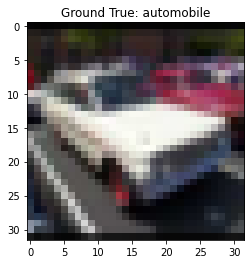

18844 1


In [34]:
import random
label = ["airplane", "automobile", "bird", "cat", "deer","dog", "frog", "horse", "ship", "truck"]
n = random.randint(0, x_train.shape[0]-1)

plt.imshow(x_train[n])
plt.title(f"Ground True: %s" % label[y_train[n][0]])
plt.show()
print(n, y_train[n][0])

Check the distribution of image classes

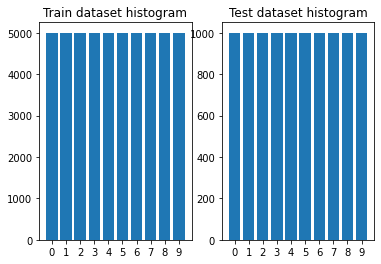

In [4]:
import numpy as np

train_histogram = np.histogram(y_train)
test_histogram = np.histogram(y_test)
_, axs = plt.subplots(1, 2)
axs[0].set_xticks(range(10))
axs[0].bar(range(10), train_histogram[0])
axs[0].set_title('Train dataset histogram')
axs[1].set_xticks(range(10))
axs[1].bar(range(10), test_histogram[0])
axs[1].set_title('Test dataset histogram')
plt.show()

#### Model training ( Classification )
max_trials=2, and don't set epochs so it will be adaptive

In [5]:
# callbacks
checkpoint_path = './checkpoint'
callbacks = [tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, save_weights_only=True)]

# Initialize the ImageClassifier.
clf = ak.ImageClassifier( max_trials=2 )
# Search for the best model.
clf.fit(x_train, y_train, batch_size=128, epochs=10, callbacks=callbacks)

Trial 3 Complete [00h 04m 34s]
val_loss: 1.560775637626648

Best val_loss So Far: 0.8734359741210938
Total elapsed time: 00h 05m 13s
INFO:tensorflow:Oracle triggered exit
Epoch 1/10
391/391 [==============================] - 4s 8ms/step - loss: 1.6677 - accuracy: 0.3884
Epoch 2/10
391/391 [==============================] - 3s 8ms/step - loss: 1.3021 - accuracy: 0.5310
Epoch 3/10
391/391 [==============================] - 3s 8ms/step - loss: 1.1470 - accuracy: 0.5897
Epoch 4/10
391/391 [==============================] - 3s 8ms/step - loss: 1.0593 - accuracy: 0.6243
Epoch 5/10
391/391 [==============================] - 3s 8ms/step - loss: 0.9992 - accuracy: 0.6455
Epoch 6/10
391/391 [==============================] - 3s 8ms/step - loss: 0.9579 - accuracy: 0.6622
Epoch 7/10
391/391 [==============================] - 3s 8ms/step - loss: 0.9156 - accuracy: 0.6763
Epoch 8/10
391/391 [==============================] - 3s 8ms/step - loss: 0.8852 - accuracy: 0.6874
Epoch 9/10
391/391 [=========

#### Evaluating the best model

In [6]:
metrics = clf.evaluate(x_test, y_test) 
print(metrics) 

313/313 [==============================] - 1s 3ms/step - loss: 0.8032 - accuracy: 0.7171
[0.8032066226005554, 0.7171000242233276]


1/1 [==============================] - 0s 25ms/step


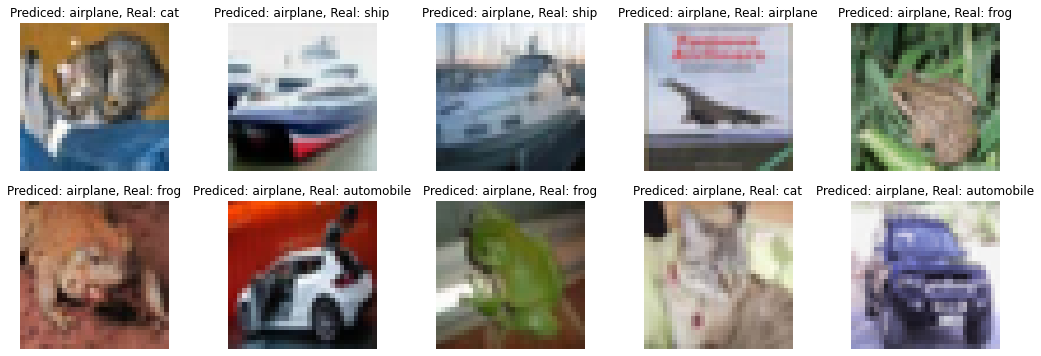

In [8]:
predicted_y = clf.predict(x_test[:10]).argmax(axis=1)
labelNames = ["airplane", "automobile", "bird", "cat", "deer",
        "dog", "frog", "horse", "ship", "truck"]
fig = plt.figure(figsize=[18,6])
for i in range(len(predicted_y)):
    ax = fig.add_subplot(2, 5, i+1)
    ax.set_axis_off()
    ax.set_title('Prediced: %s, Real: %s' % (labelNames[int(predicted_y[i])], labelNames[int(y_test[i])]))
    img = x_test[i]
    ax.imshow(img)
plt.show()

#### Improving the model search
If we need more precision in less time, we can fine-tune our model using an advanced Autokeras feature that allows you to customize your search space.

Using AutoModel with ImageBlock instead of ImageClassifier, we can create high-level configurations, such as block_type for the type of neural network to look for, we can also perform data normalization or perform data augmentation.

If we have knowledge of deep learning and have faced this problem before, we can design a suitable architecture as a EfficientNet-based image regressor, for instance, which is a deep residual learning architecture for image recognition. https://keras.io/api/applications/efficientnet/

In [ ]:
# image input 
input_node = ak.ImageInput()

# hidden layers
output_node = ak.EfficientNetBlock(
    # Only use EfficientNetb7 architecture.
    version="b7",
    # Load pretrained ImageNet weights 
    pretrained=True)(input_node)

# classification layer
output_node = ak.ClassificationHead()(output_node)
# Search for the best model with EarlyStopping.
from tensorflow.keras import callbacks as tf_callbacks
cbs = [
    tf_callbacks.EarlyStopping(patience=2, verbose=1),
]
clf = ak.AutoModel(
    inputs=input_node,
    outputs=output_node,
    overwrite=False,
    max_trials=10,
    objective='val_accuracy')
clf.fit(x_train, y_train, callbacks = cbs, verbose=1, epochs=10)

In [7]:
# Evaluate the chosen model with testing data
print(x_test.shape)
print(y_test.shape)
clf.evaluate(x_test, y_test)

(10000, 32, 32, 3)
(10000, 1)
313/313 [==============================] - 1s 3ms/step - loss: 0.8032 - accuracy: 0.7171


[0.8032066226005554, 0.7171000242233276]

#### Visualizing the model

In [14]:
# First we export the model to a keras model
model = clf.export_model()
model.save('./model')

# loading
# exposureModel = load_model(exposureModelPath, custom_objects=ak. CUSTOM_OBJECTS)

# Now, we ask for the model Sumary:
clf.summary()

INFO:tensorflow:Assets written to: ./model\assets


AttributeError: 'ImageClassifier' object has no attribute 'summary'

In [10]:
from tensorflow.keras.utils import plot_model
plot_model(clf.export_model())

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [11]:
!pip install pydot

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
